In [1]:
using Plots
using LinearAlgebra
gr()
Plots.GRBackend()

Plots.GRBackend()

# Legendre polynomial of degree n (n=0,1,...) on [-1,1] using recurrence relation

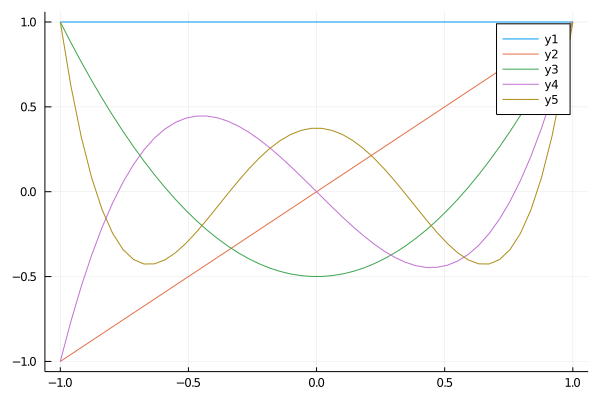

In [2]:
function legendre(x, n)
    """
    Legendre polynomials of degree n (start form n=0)
    defined on [-1,1] using Recurrence
    """
    m = length(x)
    if n < 0 # I need this case for triangular case
        L = zeros(m,1)
    elseif n == 0
        L = ones(m, n+1)
        return L
    elseif n == 1
        L = ones(m, n+1)
        L[:, 2] = x
        return L
    else
        L = ones(m, n+1)
        L[:, 2] = x
        for i=1:n-1
            L[:,i+2] = ((2*i+1)*x .* L[:,i+1] - i*L[:,i]) / (i+1)
        end
        return L
    end
end

n = 4  # gives first 5 Legendre poly
x = LinRange(-1, 1, 50)
L = legendre(x, n)
plot(x, L)


Note that we can define Legendre on [0,1] by changing x to 2x-1

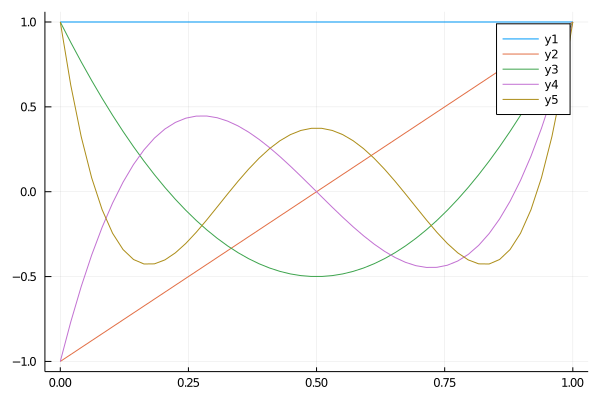

In [3]:
n = 4  # gives first 5 Legendre poly
x = LinRange(0, 1, 50)
L = legendre(2 .*x .- 1, n)   # gives first 5 Legendre poly on [0,1]
plot(x, L)

# Legendre polynomial of degree n (n=0,1,...) on [0,1] using Bernstein basis

In [4]:
function bernstein(x, n, i)
    """
    Bernstein basis
    """
    if i <= n
        b = x .^i .* (1 .- x).^(n-i) * factorial(n) / (factorial(i) * factorial(n - i))
    else
        b = 0
    end
    return b
end

bernstein (generic function with 1 method)

In [5]:
function legendre_bernstein(x, n)
    """
    Legendre Polynomial of degree n (start form n=0) 
    in terms of Bernstein basis defined on [0,1]
    eq.(5) of the Farouki's paper
    """
    m = length(x)
    L = zeros(m, n+1)
    for j = 0:n
        for i = 0:j
            L[:,j+1] += (-1.0)^(j+i) *bernstein(x, j , i) * factorial(j) / (factorial(i) * factorial(j - i))
        end
    end
    return L
end

legendre_bernstein (generic function with 1 method)

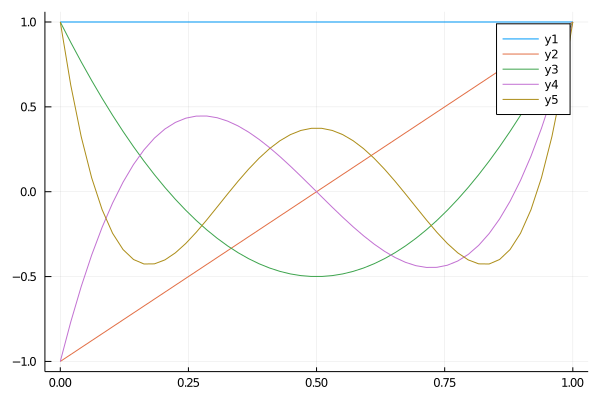

In [6]:
n = 4
x = LinRange(0, 1, 50)
L = legendre_bernstein(x, n)
plot(x, L)

# Orthogonal polynomial over a square domain [0,1]x[0,1]

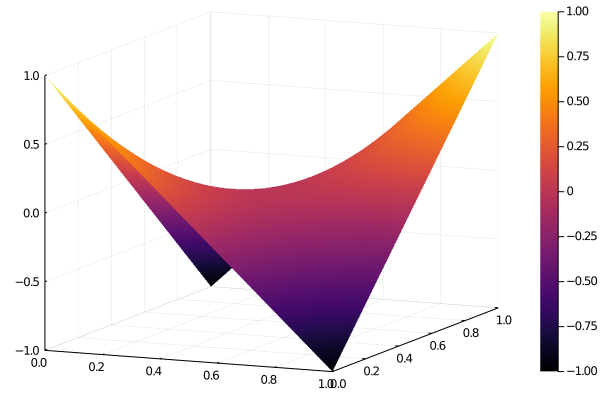

In [8]:
function legendre2D(x,y,n,r)
    """
    Lnr = L(x,n) * L(y,r)
    """
    Lx = legendre([2*x-1], n)
    Ly = legendre([2*y-1], r)
    Lnr = Lx[1,end]*Ly[1,end]
    return Lnr
end

x = LinRange(0, 1, 50)
y = LinRange(0, 1, 50)
n = 1
r = 1
f(x, y) = legendre2D(x,y,n,r)
plot(x, y, f, st = :surface)

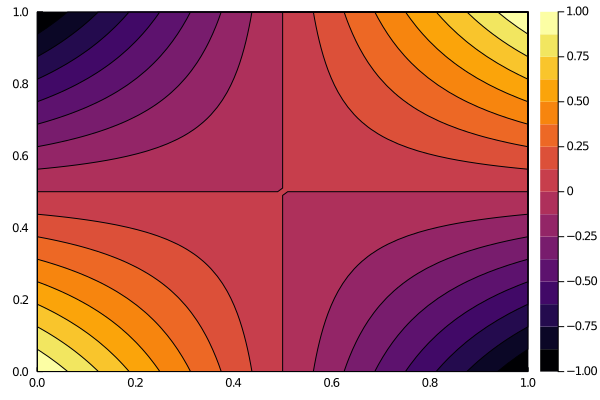

In [9]:
contourf(x, y, f)

# Orthogonal polynomial over a traingular domain using Bernstein basis

In [10]:
function q(w, n, r)
    """
    eq.(21) of the Farouki's paper
    """
    qnr = 0
    for j = 0:r
        qnr += (-1.0)^j * bernstein(w,n-r,j) * factorial(n+r+1) / (factorial(j) * factorial(n+r+1 - j))
    end
    return qnr
end

q (generic function with 1 method)

In [11]:
function polytri_bernstein(u, w, n, r)
    """
    Orthogonla polynomial of degree (n,r)=0,1,.. r<=n 
    on Triangular domain (0,0), (1,0), (0,1). 
    eq.(21) of the Farouki's paper
    """
    L = legendre_bernstein([u/(1-w)], r)
    P = L[1,r+1] * (1-w)^r * q(w, n, r)
    
    return P

end

polytri_bernstein (generic function with 1 method)

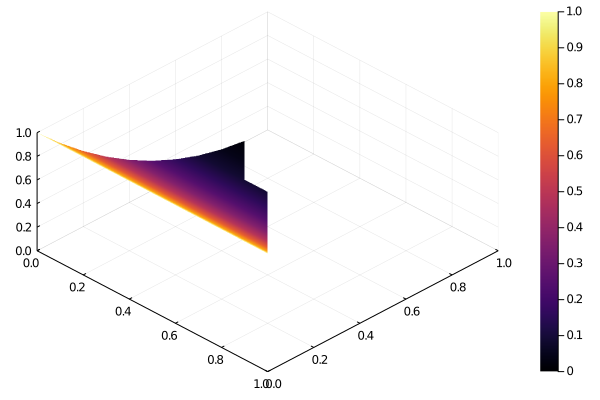

In [12]:
x = 0:0.1:1
y = 0:0.1:1
n = 2
r = 0
function f(x,y)
     return x <= 1.0-y ? polytri_bernstein(x, y, n, r) : NaN
end
plot(x, y, f, st = :surface, camera = (45,70))

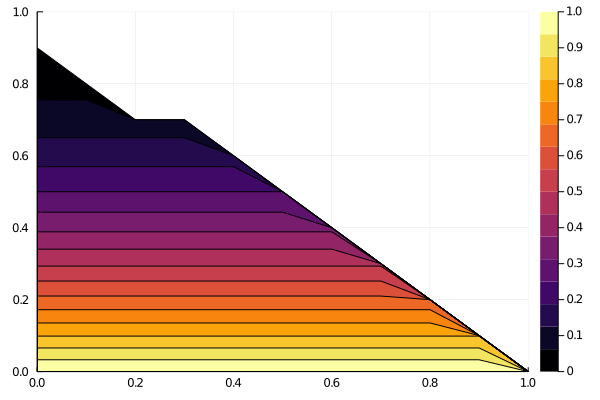

In [13]:
contourf(x, y, f)

The way I defined plot over triangular domain is not good. It seems we miss some data